In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import joblib
from sklearn.model_selection import train_test_split
import torch
import torch.nn.init as init


In [2]:
pd.options.display.max_columns=300


In [3]:
data_path = 'kddcup.data.gz' #Specifies the path to the dataset.

col_names = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins","logged_in",
             "num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells","num_access_files","num_outbound_cmds",
             "is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
             "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate","dst_host_diff_srv_rate",
             "dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate","dst_host_rerror_rate",
             "dst_host_srv_rerror_rate","label"]


df = pd.read_csv(data_path,names=col_names, index_col=False) #Reads the dataset from the CSV file into a pandas DataFrame df

In [4]:
df.info

<bound method DataFrame.info of          duration protocol_type service flag  src_bytes  dst_bytes  land  \
0               0           tcp    http   SF        215      45076     0   
1               0           tcp    http   SF        162       4528     0   
2               0           tcp    http   SF        236       1228     0   
3               0           tcp    http   SF        233       2032     0   
4               0           tcp    http   SF        239        486     0   
...           ...           ...     ...  ...        ...        ...   ...   
4898426         0           tcp    http   SF        212       2288     0   
4898427         0           tcp    http   SF        219        236     0   
4898428         0           tcp    http   SF        218       3610     0   
4898429         0           tcp    http   SF        219       1234     0   
4898430         0           tcp    http   SF        219       1098     0   

         wrong_fragment  urgent  hot  num_failed_logins

In [5]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'label'],
      dtype='object')

In [15]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4898431.0,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06
mean,4.834243e+01,1.834621e+03,1.093623e+03,5.716116e-06,6.487792e-04,7.961733e-06,1.243766e-02,3.205108e-05,1.435290e-01,8.088304e-03,6.818510e-05,3.674646e-05,1.293496e-02,1.188748e-03,7.430951e-05,1.021143e-03,0.0,4.082940e-07,8.351654e-04,3.349734e+02,2.952671e+02,1.779703e-01,1.780370e-01,5.766509e-02,5.773010e-02,7.898842e-01,2.117961e-02,2.826080e-02,2.329811e+02,1.892142e+02,7.537132e-01,3.071111e-02,6.050520e-01,6.464107e-03,1.780911e-01,1.778859e-01,5.792780e-02,5.765941e-02
std,7.233298e+02,9.414311e+05,6.450123e+05,2.390833e-03,4.285434e-02,7.215084e-03,4.689782e-01,7.299408e-03,3.506116e-01,3.856481e+00,8.257146e-03,8.082432e-03,3.938075e+00,1.241857e-01,8.737590e-03,3.551048e-02,0.0,6.389788e-04,2.888716e-02,2.119908e+02,2.459927e+02,3.818756e-01,3.822541e-01,2.322529e-01,2.326604e-01,3.892958e-01,8.271458e-02,1.405596e-01,6.402094e+01,1.059128e+02,4.111860e-01,1.085432e-01,4.809877e-01,4.125978e-02,3.818382e-01,3.821774e-01,2.309428e-01,2.309777e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,4.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,1.210000e+02,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.550000e+02,4.900000e+01,4.100000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,5.200000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,5.100000e+02,5.100000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.550000e+02,2.550000e+02,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,1.032000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,5.110000e+02,5.110000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.550000e+02,2.550000e+02,1.000000e+00,4.000000e-02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.

In [19]:
df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [6]:
df.shape

(4898431, 42)

In [7]:
np.unique(df['label'])

array(['back.', 'buffer_overflow.', 'ftp_write.', 'guess_passwd.',
       'imap.', 'ipsweep.', 'land.', 'loadmodule.', 'multihop.',
       'neptune.', 'nmap.', 'normal.', 'perl.', 'phf.', 'pod.',
       'portsweep.', 'rootkit.', 'satan.', 'smurf.', 'spy.', 'teardrop.',
       'warezclient.', 'warezmaster.'], dtype=object)

# Data Cleaning

In [8]:
missing_values = df.isnull().sum()
print("Valeurs manquantes par colonne :")
print(missing_values[missing_values > 0])

Valeurs manquantes par colonne :
Series([], dtype: int64)


In [9]:
# Supprimer les lignes avec des valeurs manquantes
data_cleaned = df.dropna()

# Afficher les dimensions du dataset original et nettoyé
print("Dimensions originales :", df.shape)
print("Dimensions après suppression des valeurs manquantes :", data_cleaned.shape)

Dimensions originales : (4898431, 42)
Dimensions après suppression des valeurs manquantes : (4898431, 42)


*Remplacer les valeurs manquantes par la moyenne de chaque colonne*

data_filled = data.fillna(data.mean())

# Data Transformation

## get object and category data 

In [10]:
# Charger le dataset
def load_labeled_dataset(data):
    features = data.drop(columns=['label'])  
    labels = data['label']
    return features, labels


In [11]:
features, labels = load_labeled_dataset(df)

In [12]:
labels

0          normal.
1          normal.
2          normal.
3          normal.
4          normal.
            ...   
4898426    normal.
4898427    normal.
4898428    normal.
4898429    normal.
4898430    normal.
Name: label, Length: 4898431, dtype: object

In [13]:
features.head

<bound method NDFrame.head of          duration protocol_type service flag  src_bytes  dst_bytes  land  \
0               0           tcp    http   SF        215      45076     0   
1               0           tcp    http   SF        162       4528     0   
2               0           tcp    http   SF        236       1228     0   
3               0           tcp    http   SF        233       2032     0   
4               0           tcp    http   SF        239        486     0   
...           ...           ...     ...  ...        ...        ...   ...   
4898426         0           tcp    http   SF        212       2288     0   
4898427         0           tcp    http   SF        219        236     0   
4898428         0           tcp    http   SF        218       3610     0   
4898429         0           tcp    http   SF        219       1234     0   
4898430         0           tcp    http   SF        219       1098     0   

         wrong_fragment  urgent  hot  num_failed_logins  

In [20]:
categorical_columns = features.select_dtypes(include=['object', 'category']).columns.tolist()
# Afficher les colonnes catégorielles
print("Colonnes catégorielles :")
print(categorical_columns)

Colonnes catégorielles :
['protocol_type', 'service', 'flag']


## Encoding 

In [21]:
# Conversion de 'normal' à 1 et les autres à 0
labels = labels.apply(lambda x: 1 if x == 'normal.' else 0)
print(np.unique(labels))

[0 1]


In [22]:
# Créer un encodeur
label_encoder = LabelEncoder()
for colonne in categorical_columns:
    # Appliquer le label encoding à une colonne spécifique
    features[colonne] = label_encoder.fit_transform(features[colonne])
    
features

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,1,24,9,215,45076,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.00,0,0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0
1,0,1,24,9,162,4528,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.00,1,1,1.0,0.0,1.00,0.00,0.0,0.00,0.0,0.0
2,0,1,24,9,236,1228,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.00,2,2,1.0,0.0,0.50,0.00,0.0,0.00,0.0,0.0
3,0,1,24,9,233,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.00,3,3,1.0,0.0,0.33,0.00,0.0,0.00,0.0,0.0
4,0,1,24,9,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,3,0.0,0.0,0.0,0.0,1.0,0.0,0.00,4,4,1.0,0.0,0.25,0.00,0.0,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4898426,0,1,24,9,212,2288,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,32,0.0,0.0,0.0,0.0,1.0,0.0,0.16,3,255,1.0,0.0,0.33,0.05,0.0,0.01,0.0,0.0
4898427,0,1,24,9,219,236,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,33,0.0,0.0,0.0,0.0,1.0,0.0,0.15,4,255,1.0,0.0,0.25,0.05,0.0,0.01,0.0,0.0
4898428,0,1,24,9,218,3610,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,34,0.0,0.0,0.0,0.0,1.0,0.0,0.15,5,255,1.0,0.0,0.20,0.05,0.0,0.01,0.0,0.0
4898429,0,1,24,9,219,1234,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,35,0.0,0.0,0.0,0.0,1.0,0.0,0.14,6,255,1.0,0.0,0.17,0.05,0.0,0.01,0.0,0.0


In [17]:
# Enregistrer le LabelEncoder
joblib.dump(label_encoder, 'label_encoder.pkl')

# Pour charger le LabelEncoder plus tard
#loaded_encoder = joblib.load('label_encoder.pkl')

['label_encoder.pkl']

In [23]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Créer la matrice de corrélation
correlation_matrix = features.corr()



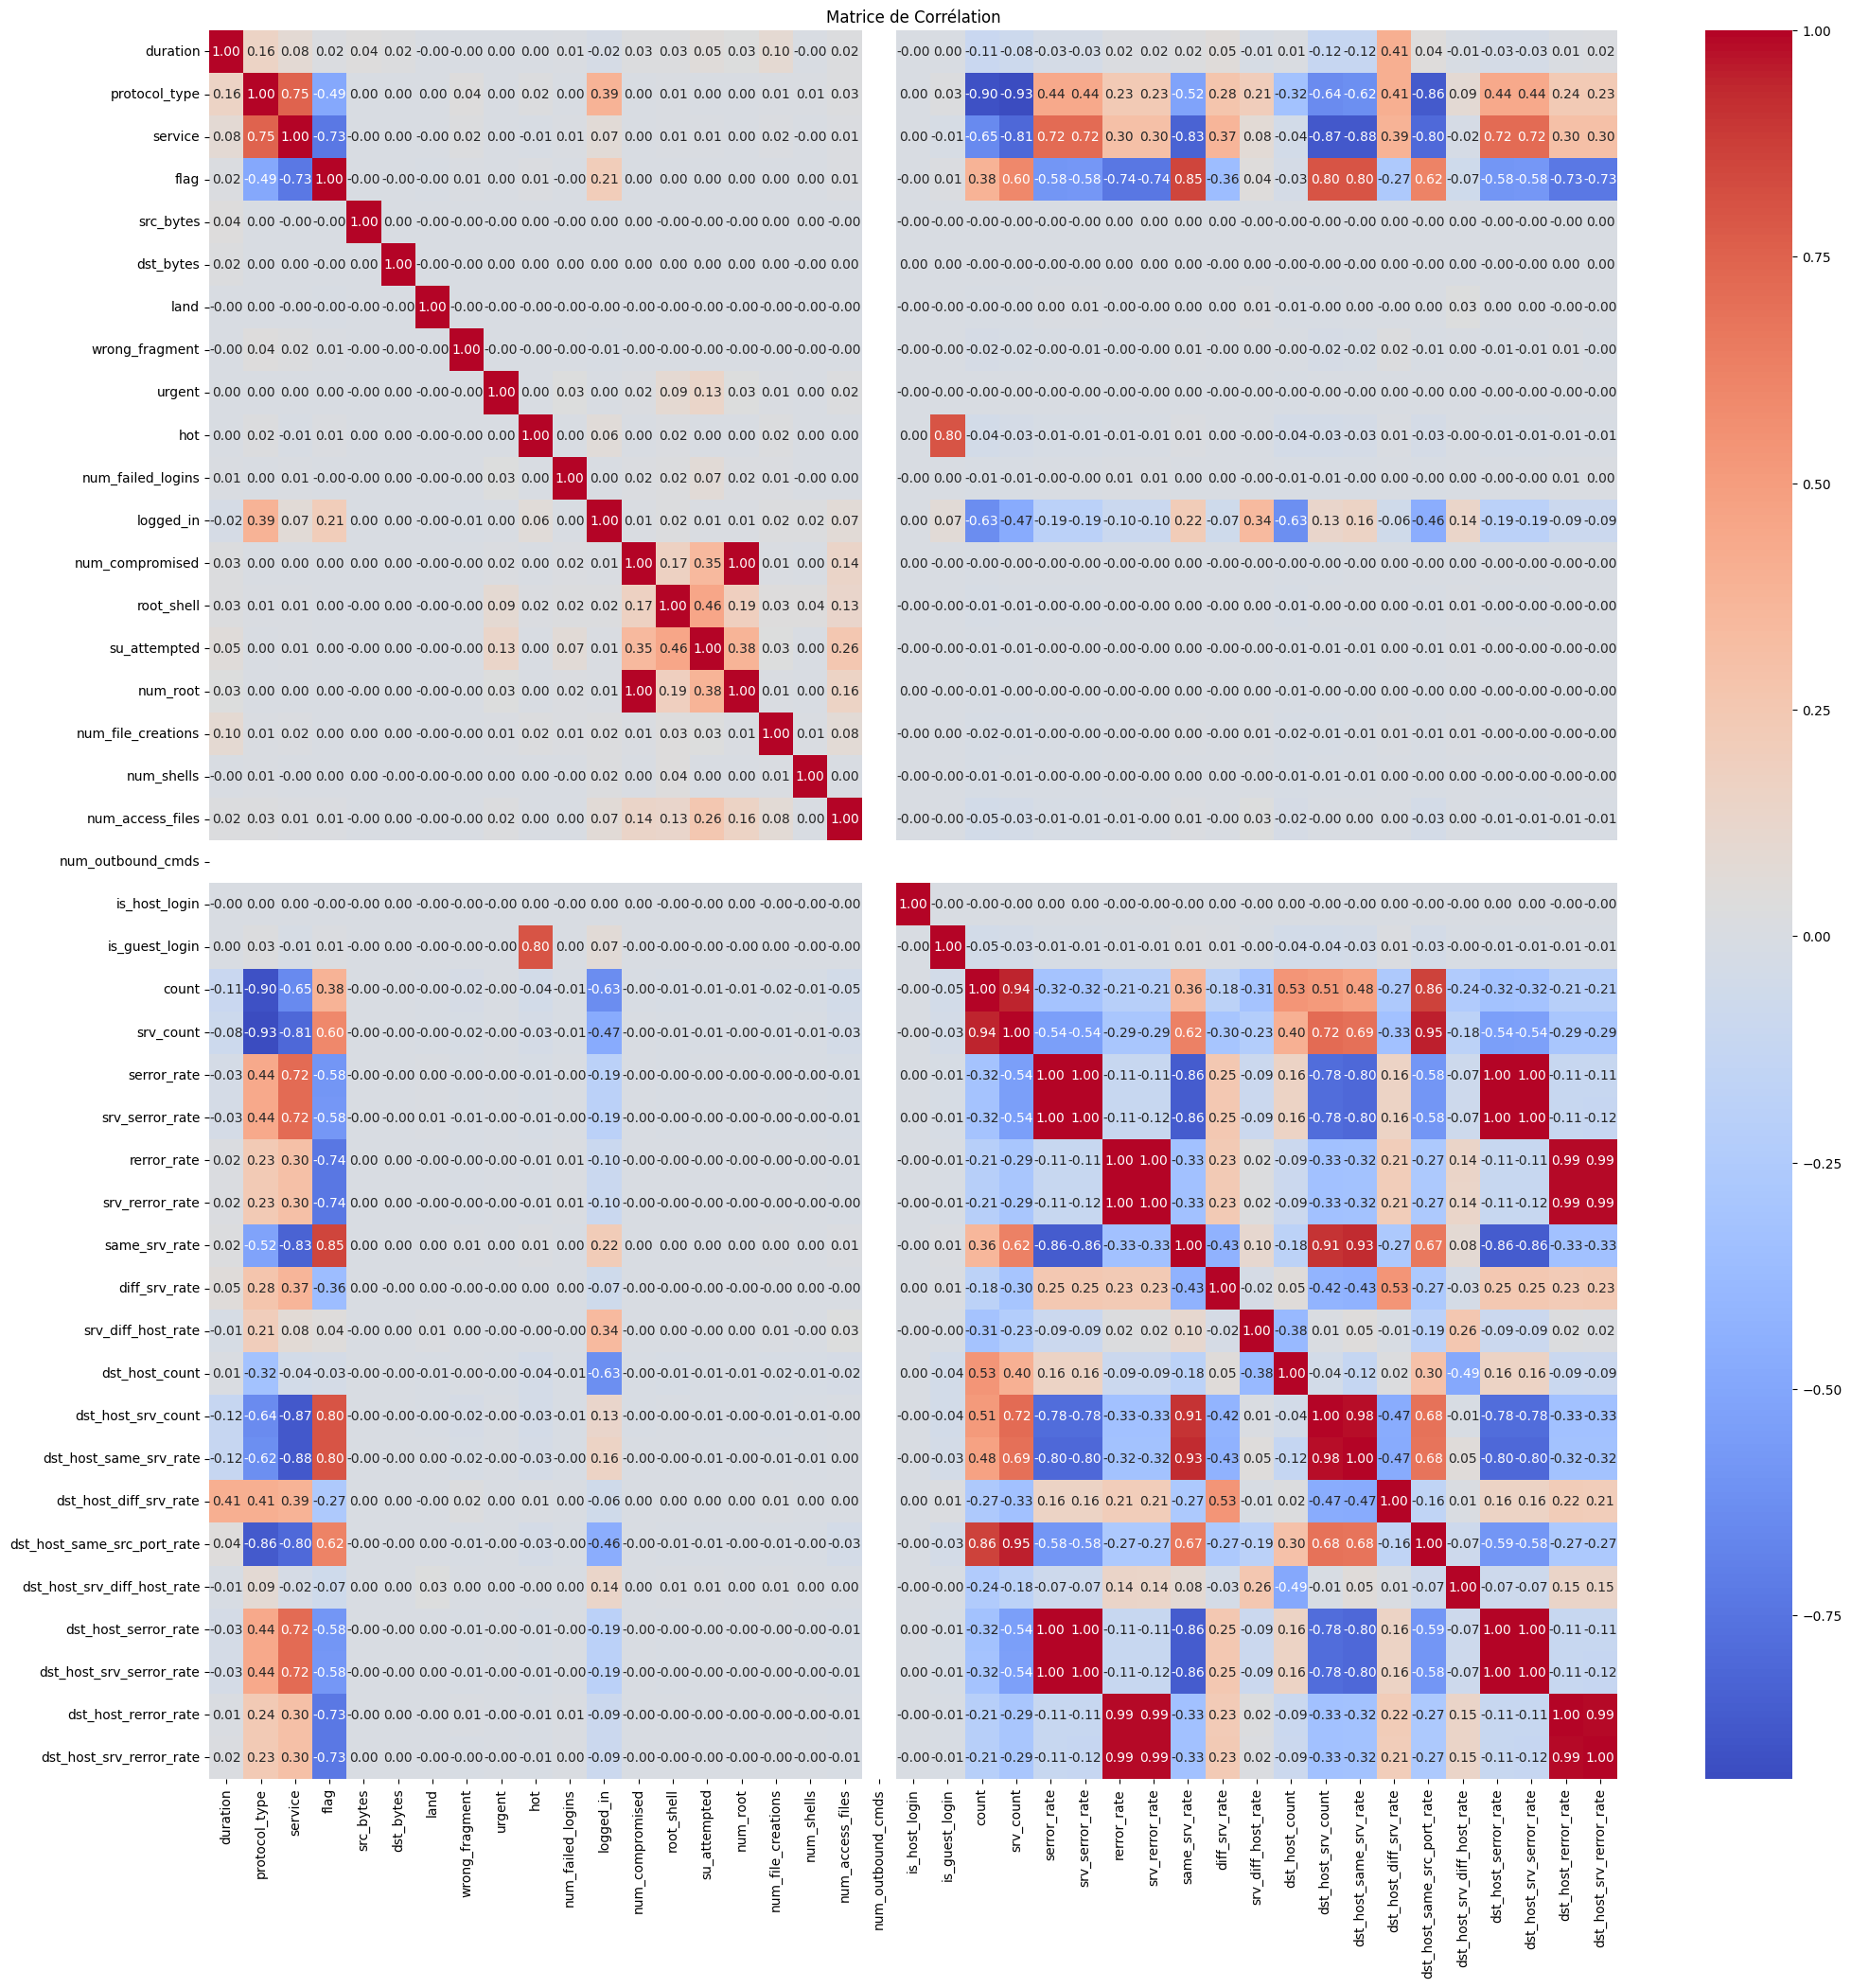

In [24]:
# Création d'une heatmap avec seaborn
plt.figure(figsize=(24, 24))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
# Titres et affichage
plt.title('Matrice de Corrélation')
plt.show()

In [25]:
# Identifier les colonnes fortement corrélées
# Supposons que vous souhaitez un seuil de corrélation > 0.9
threshold = 0.9
columns_to_drop = set()

for col in correlation_matrix.columns:
    for index, value in enumerate(correlation_matrix[col]):
        if value > threshold and col != correlation_matrix.columns[index]:
            columns_to_drop.add(correlation_matrix.columns[index])
print("Colonnes supprimées :", columns_to_drop, len(columns_to_drop))

Colonnes supprimées : {'rerror_rate', 'dst_host_srv_rerror_rate', 'srv_rerror_rate', 'dst_host_srv_serror_rate', 'dst_host_serror_rate', 'count', 'same_srv_rate', 'srv_count', 'num_root', 'srv_serror_rate', 'num_compromised', 'dst_host_srv_count', 'dst_host_same_src_port_rate', 'dst_host_same_srv_rate', 'dst_host_rerror_rate', 'serror_rate'} 16


In [26]:
# Supprimer les colonnes inutiles
features = features.drop(columns=list(columns_to_drop))

In [27]:
features.shape

(4898431, 25)

In [28]:
features.dtypes

duration                         int64
protocol_type                    int32
service                          int32
flag                             int32
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
root_shell                       int64
su_attempted                     int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
diff_srv_rate                  float64
srv_diff_host_rate             float64
dst_host_count                   int64
dst_host_diff_srv_rate         float64
dst_host_srv_diff_host_rate    float64
dtype: object

In [30]:
features.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'root_shell', 'su_attempted',
       'num_file_creations', 'num_shells', 'num_access_files',
       'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_diff_srv_rate',
       'dst_host_srv_diff_host_rate'],
      dtype='object')

In [31]:

scaler = StandardScaler()
features = scaler.fit_transform(features)

# Enregistrer le scaler
joblib.dump(scaler, 'standard_scaler.pkl')

# Pour charger le scaler plus tard
#scaler = joblib.load('standard_scaler.pkl')

['standard_scaler.pkl']

In [ ]:
features

In [ ]:
# Assuming features and labels are DataFrames
features_df = pd.DataFrame(features)
labels_df = pd.DataFrame(labels)

# Save to CSV
features_df.to_csv('features.csv', index=False)
labels_df.to_csv('labels.csv', index=False)

In [2]:
# Load features and labels from CSV
features_df = pd.read_csv('features.csv')
labels_df = pd.read_csv('labels.csv')


In [3]:
# Vérifier la taille des données
print(f"Features shape: {features_df.shape}")
print(f"Labels shape: {labels_df.shape}")

Features shape: (4898431, 25)
Labels shape: (4898431, 1)


In [4]:
# Échantillonner aléatoirement 1000 lignes
sampled_features = features_df.sample(n=10000, random_state=42)
sampled_labels = labels_df.loc[sampled_features.index]  # Correspondre aux mêmes index

In [5]:
# Vérifier la taille des données
print(f"Features shape: {sampled_features.shape}")
print(f"Labels shape: {sampled_labels.shape}")

Features shape: (10000, 25)
Labels shape: (10000, 1)


In [6]:
# Convert DataFrames to NumPy arrays
features = sampled_features.values
labels = sampled_labels.values.flatten() 

In [7]:
X_train, X_val, y_train, y_val = train_test_split(features, labels, test_size=0.2, random_state=42)
X_train, y_train, X_val, y_val = torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.long), \
           torch.tensor(X_val, dtype=torch.float32), torch.tensor(y_val, dtype=torch.long)

In [8]:

from torch.utils.data import DataLoader, TensorDataset

# Création des DataLoaders pour entraînement et validation
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)


In [9]:

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [11]:
from tqdm import tqdm

for batch_x, batch_y in tqdm(train_loader):
        t = torch.randint(1, 100, (batch_x.size(0),))  # Étapes aléatoires
        print(t)
        print("=====")
        x_t = add_noise(batch_x, t)  # Ajouter du bruit
        break

x = torch.randn(2, 3)
print( "x ", x)
y = torch.randn(2, 3)
print( "y ", y)
torch.cat((x, y), 1)

x = torch.randn(2, 3)

In [12]:
# Vérification de l'appareil
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Appareil utilisé : {device}")

# === 1. Fonction pour ajouter du bruit étape par étape ===
def add_progressive_noise(data, t, beta_schedule):
    """Ajoute du bruit gaussien progressivement."""
    batch_size = data.size(0)
    
    # Extraire les beta correspondants pour chaque échantillon
    beta = beta_schedule[t - 1]  # beta pour chaque échantillon (batch_size,)
    beta = beta.view(-1, 1)  # Ajuste la dimension pour correspondre à data
    
    # Générer le bruit
    noise = torch.randn_like(data) * torch.sqrt(beta)
    
    # Calculer alpha_t pour chaque échantillon
    alpha_t = torch.ones(batch_size, device=data.device)  # Initialiser alpha_t à 1
    for i in range(batch_size):
        alpha_t[i] = torch.prod(1 - beta_schedule[:t[i]])  # Produit des (1 - beta) jusqu'à t[i]
    
    alpha_t = alpha_t.view(-1, 1)  # Ajuster la dimension
    return torch.sqrt(alpha_t) * data + torch.sqrt(1 - alpha_t) * noise

# === 2. Planification des coefficients beta ===
def linear_beta_schedule(T, start=0.0001, end=0.02):
    """Renvoie une planification linéaire des coefficients beta."""
    return torch.linspace(start, end, T)

# === 3. Modèle UNet simplifié pour vecteurs ===
class UNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(UNet, self).__init__()
        self.layer1 = nn.Linear(input_dim + 1, hidden_dim)  # Ajouter temps comme condition
        self.layer2 = nn.Linear(hidden_dim, 64)
        self.layer3 = nn.Linear(64, 32)
        self.layer4 = nn.Linear(32, output_dim)

    def forward(self, x, t):
        x = torch.cat((x, t.unsqueeze(1).float()), dim=1)  # Inclure le temps comme condition
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.relu(self.layer3(x))
        return self.layer4(x)

# === 4. Modèle de diffusion ===
class DiffusionIDS(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(DiffusionIDS, self).__init__()
        self.unet = UNet(input_dim, hidden_dim, output_dim)

    def forward(self, x_t, t):
        logits = self.unet(x_t, t)
        probs = F.softmax(logits, dim=-1)
        return probs


Appareil utilisé : cpu


In [13]:
# Fonction pour initialiser les paramètres du modèle
def initialize_weights(module):
    if isinstance(module, nn.Linear):
        init.xavier_uniform_(module.weight)  # Xavier Uniform pour les poids
        if module.bias is not None:
            init.constant_(module.bias, 0)  # Initialisation des biais à 0

In [14]:
# === 6. Entraînement du modèle ===
input_dim = X_train.shape[1]
hidden_dim = 128
output_dim = 2  # Classification binaire
T = 30  # Nombre total d'étapes de bruit
beta_schedule = linear_beta_schedule(T).to(device)

model = DiffusionIDS(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim).to(device)

In [15]:
# Avant l'initialisation
print("Avant l'initialisation :")
for name, param in model.named_parameters():
    print(f"{name}: {param.mean()}")


Avant l'initialisation :
unet.layer1.weight: -0.004288644529879093
unet.layer1.bias: -0.001779788639396429
unet.layer2.weight: -0.001128302188590169
unet.layer2.bias: 0.006971088238060474
unet.layer3.weight: -0.0021555344574153423
unet.layer3.bias: 0.03902183473110199
unet.layer4.weight: -0.023865878582000732
unet.layer4.bias: 0.06851118057966232


In [16]:
# Créer et initialiser un modèle DiffusionIDS
model.apply(initialize_weights)  # Appliquer l'initialisation

DiffusionIDS(
  (unet): UNet(
    (layer1): Linear(in_features=26, out_features=128, bias=True)
    (layer2): Linear(in_features=128, out_features=64, bias=True)
    (layer3): Linear(in_features=64, out_features=32, bias=True)
    (layer4): Linear(in_features=32, out_features=2, bias=True)
  )
)

In [17]:
# Après l'initialisation
print("\nAprès l'initialisation :")
for name, param in model.named_parameters():
    print(f"{name}: {param.mean()}")


Après l'initialisation :
unet.layer1.weight: -0.002004416426643729
unet.layer1.bias: 0.0
unet.layer2.weight: 0.00013535577454604208
unet.layer2.bias: 0.0
unet.layer3.weight: -0.003970308229327202
unet.layer3.bias: 0.0
unet.layer4.weight: 0.04113883897662163
unet.layer4.bias: 0.0


In [18]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [22]:
num_noises =2
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for batch_x, batch_y in tqdm(train_loader, desc=f"Époque {epoch+1}/{num_epochs} - Entraînement"):
        batch_x, batch_y = batch_x.to(device), batch_y.to(device)
        t = torch.randint(1, T, (batch_x.size(0),), device=device)
        x_t = add_progressive_noise(batch_x, t, beta_schedule)


        t_values = torch.randint(1, T, (batch_x.size(0), num_noises), device=device)  # Plusieurs t par échantillon
        x_t_list = [add_progressive_noise(batch_x, t, beta_schedule) for t in t_values.T]


         # Empiler les versions bruitées
        x_t_stack = torch.cat(x_t_list, dim=0)
        y_stack = batch_y.repeat(num_noises)  # Répéter les labels
    
        # Prédictions et perte
        preds = model(x_t_stack, t_values.flatten())
        loss = criterion(preds, y_stack)

        
        # preds = model(x_t, t)
        # loss = criterion(preds, batch_y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    train_loss /= len(train_loader)

    print(f"Époque {epoch+1}/{num_epochs} : Perte entraînement {train_loss:.4f}")


Époque 1/20 - Entraînement: 100%|████████████████████████████████████████████████████| 250/250 [00:03<00:00, 81.81it/s]


Époque 1/20 : Perte entraînement 0.3194


Époque 2/20 - Entraînement: 100%|████████████████████████████████████████████████████| 250/250 [00:06<00:00, 40.75it/s]


Époque 2/20 : Perte entraînement 0.3202


Époque 3/20 - Entraînement: 100%|████████████████████████████████████████████████████| 250/250 [00:02<00:00, 96.17it/s]


Époque 3/20 : Perte entraînement 0.3194


Époque 4/20 - Entraînement: 100%|████████████████████████████████████████████████████| 250/250 [00:02<00:00, 88.76it/s]


Époque 4/20 : Perte entraînement 0.3194


Époque 5/20 - Entraînement: 100%|████████████████████████████████████████████████████| 250/250 [00:03<00:00, 71.44it/s]


Époque 5/20 : Perte entraînement 0.3195


Époque 6/20 - Entraînement: 100%|████████████████████████████████████████████████████| 250/250 [00:04<00:00, 56.34it/s]


Époque 6/20 : Perte entraînement 0.3193


Époque 7/20 - Entraînement: 100%|████████████████████████████████████████████████████| 250/250 [00:03<00:00, 71.70it/s]


Époque 7/20 : Perte entraînement 0.3193


Époque 8/20 - Entraînement: 100%|████████████████████████████████████████████████████| 250/250 [00:02<00:00, 89.56it/s]


Époque 8/20 : Perte entraînement 0.3194


Époque 9/20 - Entraînement: 100%|███████████████████████████████████████████████████| 250/250 [00:02<00:00, 104.99it/s]


Époque 9/20 : Perte entraînement 0.3198


Époque 10/20 - Entraînement: 100%|███████████████████████████████████████████████████| 250/250 [00:02<00:00, 92.41it/s]


Époque 10/20 : Perte entraînement 0.3207


Époque 11/20 - Entraînement: 100%|███████████████████████████████████████████████████| 250/250 [00:04<00:00, 55.40it/s]


Époque 11/20 : Perte entraînement 0.3201


Époque 12/20 - Entraînement: 100%|███████████████████████████████████████████████████| 250/250 [00:02<00:00, 94.93it/s]


Époque 12/20 : Perte entraînement 0.3202


Époque 13/20 - Entraînement: 100%|██████████████████████████████████████████████████| 250/250 [00:02<00:00, 101.24it/s]


Époque 13/20 : Perte entraînement 0.3200


Époque 14/20 - Entraînement: 100%|███████████████████████████████████████████████████| 250/250 [00:03<00:00, 76.78it/s]


Époque 14/20 : Perte entraînement 0.3197


Époque 15/20 - Entraînement: 100%|███████████████████████████████████████████████████| 250/250 [00:03<00:00, 78.65it/s]


Époque 15/20 : Perte entraînement 0.3197


Époque 16/20 - Entraînement: 100%|███████████████████████████████████████████████████| 250/250 [00:03<00:00, 72.51it/s]


Époque 16/20 : Perte entraînement 0.3197


Époque 17/20 - Entraînement: 100%|███████████████████████████████████████████████████| 250/250 [00:02<00:00, 97.54it/s]


Époque 17/20 : Perte entraînement 0.3199


Époque 18/20 - Entraînement: 100%|██████████████████████████████████████████████████| 250/250 [00:02<00:00, 100.59it/s]


Époque 18/20 : Perte entraînement 0.3197


Époque 19/20 - Entraînement: 100%|███████████████████████████████████████████████████| 250/250 [00:02<00:00, 97.59it/s]


Époque 19/20 : Perte entraînement 0.3195


Époque 20/20 - Entraînement: 100%|███████████████████████████████████████████████████| 250/250 [00:02<00:00, 96.61it/s]

Époque 20/20 : Perte entraînement 0.3194


In [20]:
# Enregistrer le model
joblib.dump(model, 'model.pkl')

['model.pkl']